# Random Forest and Gradient Boosting Implementation for energy usage prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
energy_data = pd.read_csv("UCI_data.csv", index_col = 0, parse_dates = True)
energy_data.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
date,,,,,,,,,,,,,,,,,,,,,
2016-04-19 20:30:00,22.200000,39.500000,20.566667,37.656667,22.230000,37.030000,22.318571,36.610000,20.633333,62.166667,...,33.90,9.70,766.100000,65.5,3.500000,40.000000,3.350000,24.061869,24.061869,60
2016-03-05 04:40:00,20.356667,37.126667,17.566667,40.230000,20.890000,37.663333,18.700000,36.260000,18.463333,43.560000,...,41.09,0.30,740.333333,99.0,1.000000,41.333333,0.100000,4.622052,4.622052,50
2016-03-14 12:40:00,20.926667,38.790000,21.100000,35.526667,21.600000,36.290000,21.000000,34.826667,18.100000,46.126667,...,38.76,4.40,768.466667,72.0,6.000000,22.666667,-0.266667,5.635898,5.635898,80
2016-01-22 15:30:00,18.290000,38.900000,17.290000,39.260000,18.390000,39.326667,16.100000,38.790000,16.100000,47.700000,...,39.20,3.35,760.600000,82.0,5.500000,41.000000,0.500000,49.216445,49.216445,40
2016-02-10 00:40:00,22.290000,42.333333,21.600000,40.433333,22.666667,43.363333,19.100000,40.900000,19.290000,50.745000,...,43.73,3.20,738.900000,88.0,7.333333,56.000000,1.400000,47.617579,47.617579,60


Check the data type of each variable.

In [5]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3290 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Freq: H
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T1             3290 non-null   float64
 1   RH_1           3290 non-null   float64
 2   T2             3290 non-null   float64
 3   RH_2           3290 non-null   float64
 4   T3             3290 non-null   float64
 5   RH_3           3290 non-null   float64
 6   T4             3290 non-null   float64
 7   RH_4           3290 non-null   float64
 8   T5             3290 non-null   float64
 9   RH_5           3290 non-null   float64
 10  T6             3290 non-null   float64
 11  RH_6           3290 non-null   float64
 12  T7             3290 non-null   float64
 13  RH_7           3290 non-null   float64
 14  T8             3290 non-null   float64
 15  RH_8           3290 non-null   float64
 16  T9             3290 non-null   float64
 17  RH_9    

As you can see from the above output, the energy usage has been measured for every 10 minutes. According to requirements,
we have to predict hourly energy usage. Therefore, it is neccessary to resample the given data.

In [6]:
energy_data = energy_data.resample('H').mean()

Extracting important features from 'date' variable to be used while prediction.

In [7]:
energy_data = energy_data.reset_index()
energy_data['Hour'] = energy_data['date'].dt.hour
energy_data['Day'] = energy_data['date'].dt.day
energy_data['Month'] = energy_data['date'].dt.month
energy_data = energy_data.dropna()
energy_data.isna().sum()

date             0
T1               0
RH_1             0
T2               0
RH_2             0
T3               0
RH_3             0
T4               0
RH_4             0
T5               0
RH_5             0
T6               0
RH_6             0
T7               0
RH_7             0
T8               0
RH_8             0
T9               0
RH_9             0
T_out            0
Press_mm_hg      0
RH_out           0
Windspeed        0
Visibility       0
Tdewpoint        0
rv1              0
rv2              0
TARGET_energy    0
Hour             0
Day              0
Month            0
dtype: int64

Partition the dataset into dependent and independent variables. Check the nature of target variable with respect to each independent variable. 

In [8]:
X = energy_data.drop(['date', 'TARGET_energy'], axis=1)
y = energy_data['TARGET_energy']

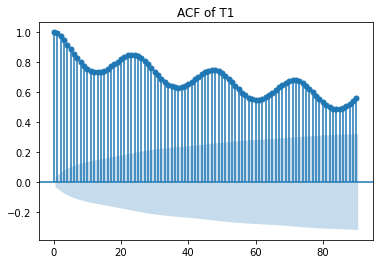

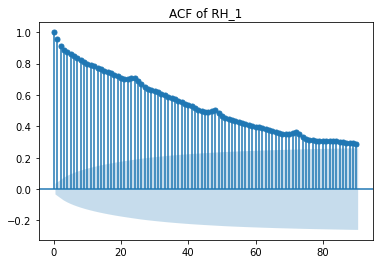

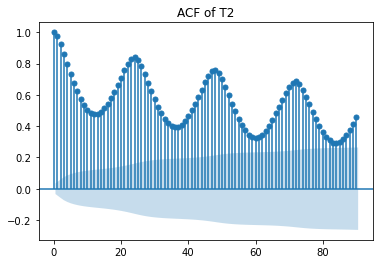

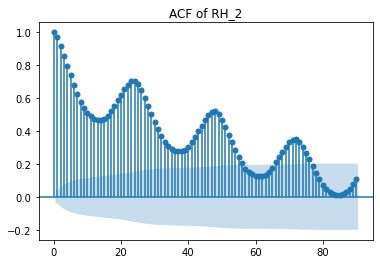

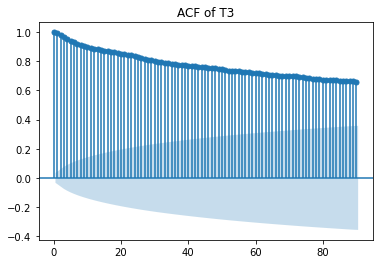

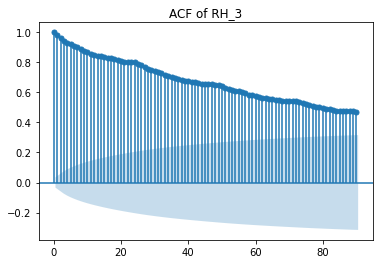

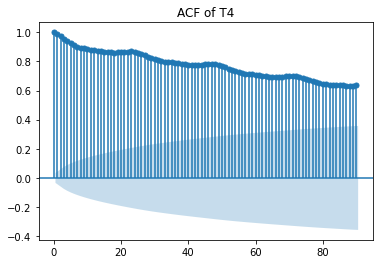

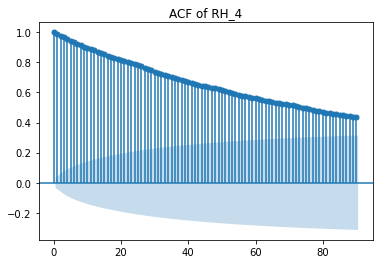

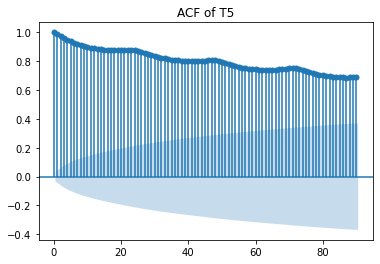

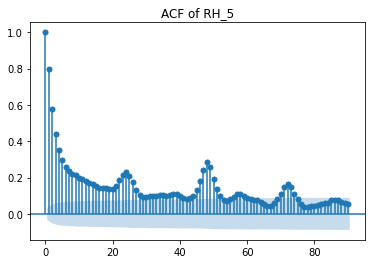

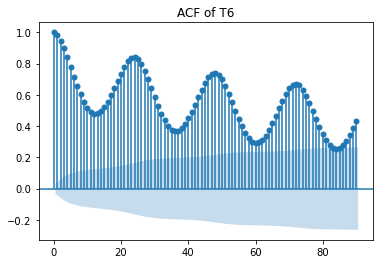

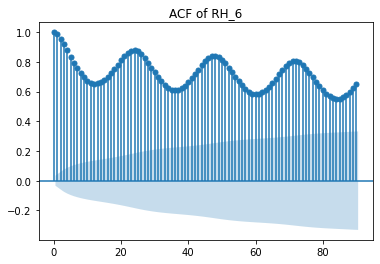

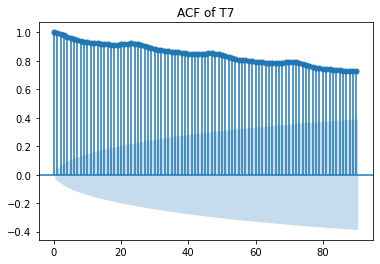

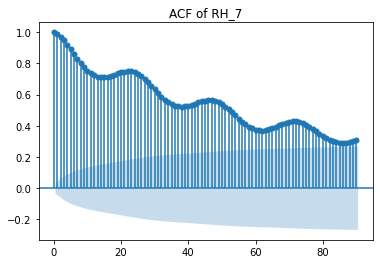

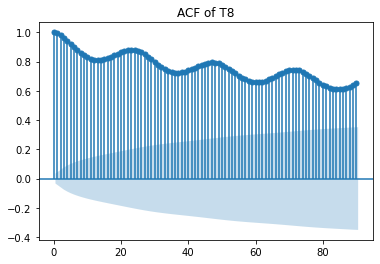

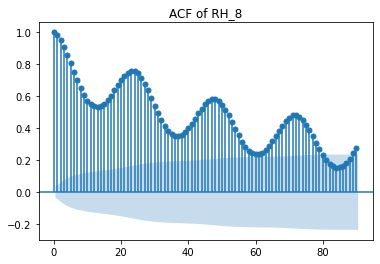

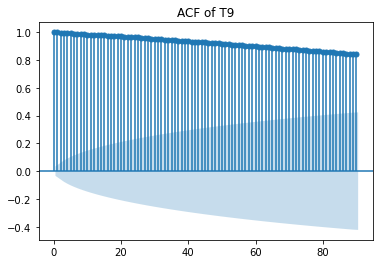

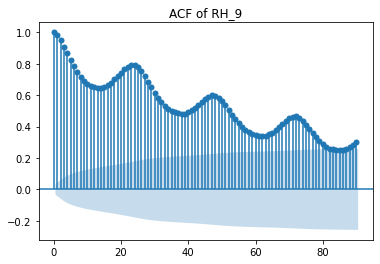

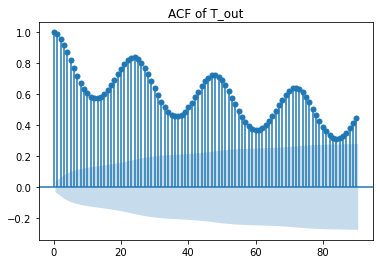

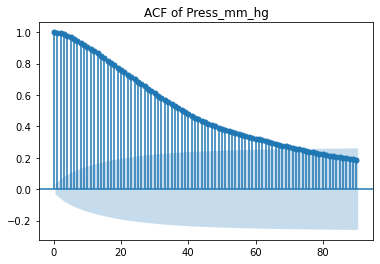

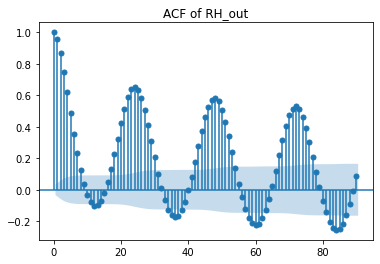

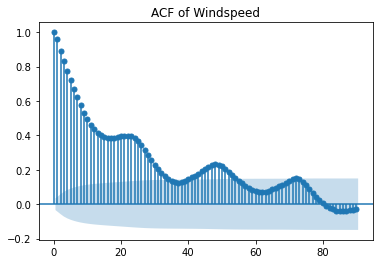

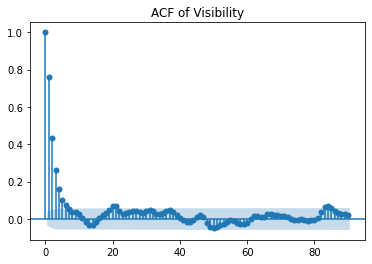

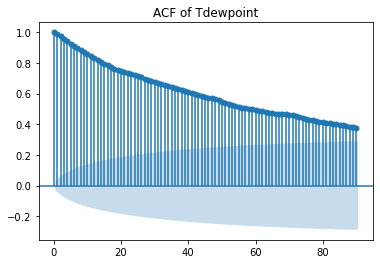

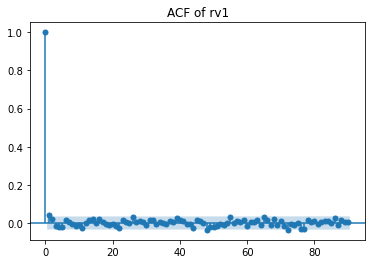

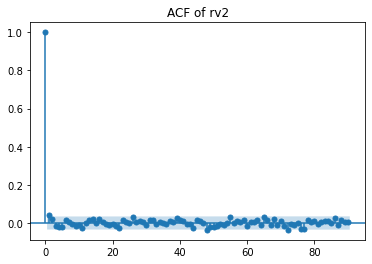

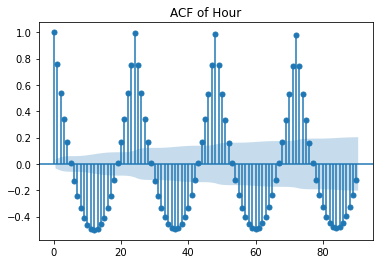

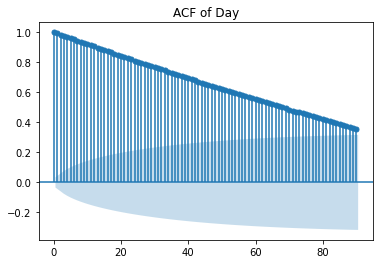

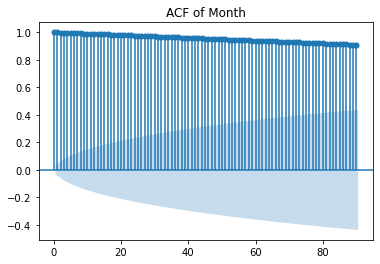

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

for column in X.iloc[:,:]:
    plot_acf(X[column], lags = 90)
    plt.title("ACF of "+column)
    plt.show()

Check for any outliers in the data.

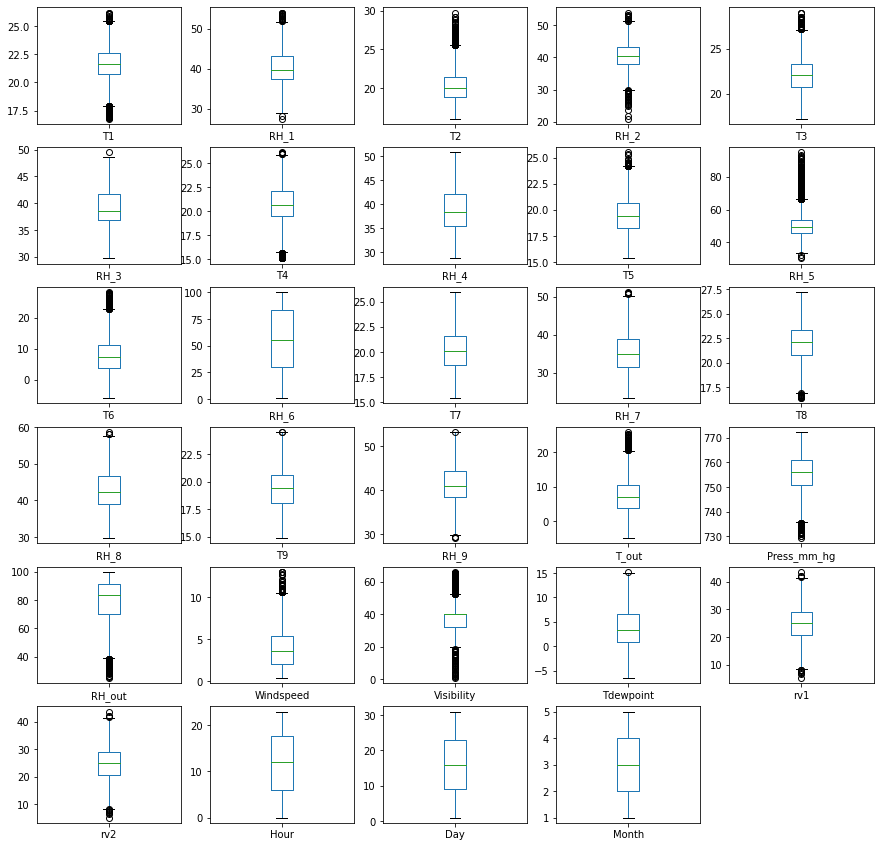

In [16]:
X.plot(kind='box', subplots=True, layout=(6,5),
sharex=False, sharey=False, figsize=(15,15))
plt.show()

This function is used to scale the variable.

In [17]:
def apply_scaling(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_scaled = scaler.fit_transform(X)
    return X_scaled

This function returns the heatmap of correlation matrix.

In [18]:
def get_correlation_matrix(X):
    df = X
    df['TARGET_energy'] = y
    correlations = df.corr()
    hm = sns.heatmap(correlations,
                     cmap = "PuBu",
                     cbar=True,
                     annot=True,
                     square=True,
                     fmt='.2f',
                     yticklabels=df.columns,
                     xticklabels=df.columns
    )
    return hm

Following tab contains two functions to build models with hyperparater tuning and cross-validation. Hyperparameters for both the models are given as a dictionary.

In [21]:
# Hyper parameters for Random forest regressor
rf_para = {
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['mse', 'mae'],
    'max_depth': [50, 100, 300, 500]
}

# Below function applies hyperparameter tuning with 5-fold cross-validation and determines the best set of parameters
# for Random forest model
def run_random_forest(X_train, X_test, y_train, y_test):
    print("****** Building Random Forest Model *****")
    model = RandomForestRegressor(verbose = 0)
    Regressor = GridSearchCV(model, rf_para, cv=5, verbose = 0)
    Regressor.fit(X_train, y_train)
    y_pred = Regressor.predict(X_test)
    
    print("Train set Accuracy: ", Regressor.score(X_train, y_train))
    print("Validation set Accuracy: ", Regressor.score(X_test, y_test))
    print("Best parameters set for Random Forest Regressor:")
    print(Regressor.best_params_)
    print('')
    return Regressor.best_params_

In [22]:
# Hyper parameters for Gradient Boosting regressor
gbm_para = {
    'loss': ['ls', 'lad', 'huber', 'quantile'],
    'max_features': ['log2', 'sqrt'],
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'learning_rate': [0.1, 0.5, 0.01]
}

# Below function applies hyperparameter tuning with 5-fold cross-validation and determines the best set of parameters
# for Gradient boosting model
def run_gbm(X_train, X_test, y_train, y_test):
    print("***** Building Gradient Boosting Model *****")
    model = GradientBoostingRegressor()
    Regressor = GridSearchCV(model, gbm_para, cv=5, n_jobs=-1, verbose = 0)
    Regressor.fit(X_train, y_train)
    y_pred = Regressor.predict(X_test)

    print("Train set Accuracy: ", Regressor.score(X_train, y_train))
    print("Validation set Accuracy: ", Regressor.score(X_test, y_test))
    print("Best parameters set for Gradient Boosting Regressor:")
    print(Regressor.best_params_)
    print('')
    return Regressor.best_params_

In [41]:
# Hyper parameters for Extreme Gradient Boosting regressor

from xgboost import XGBRegressor

xgb_para = {
    'max_features': ['log2', 'sqrt'],
    'learning_rate': [0.1, 0.5, 0.01],
    'gamma': [0.1, 1, 10],
    'alpha': [1, 5, 10]
}

# Below function applies hyperparameter tuning with 5-fold cross-validation and determines the best set of parameters
# for Extreme Gradient boosting model
def run_xgb(X_train, X_test, y_train, y_test):
    print("***** Building Extreme Gradient Boosting Model *****")
    model = XGBRegressor()
    Regressor = GridSearchCV(model, xgb_para, cv=5, n_jobs=-1, verbose = 0)
    Regressor.fit(X_train, y_train)
    y_pred = Regressor.predict(X_test)

    print("Train set Accuracy: ", Regressor.score(X_train, y_train))
    print("Validation set Accuracy: ", Regressor.score(X_test, y_test))
    print("Best parameters set for Extreme Gradient Boosting Regressor:")
    print(Regressor.best_params_)
    print('')
    return Regressor.best_params_

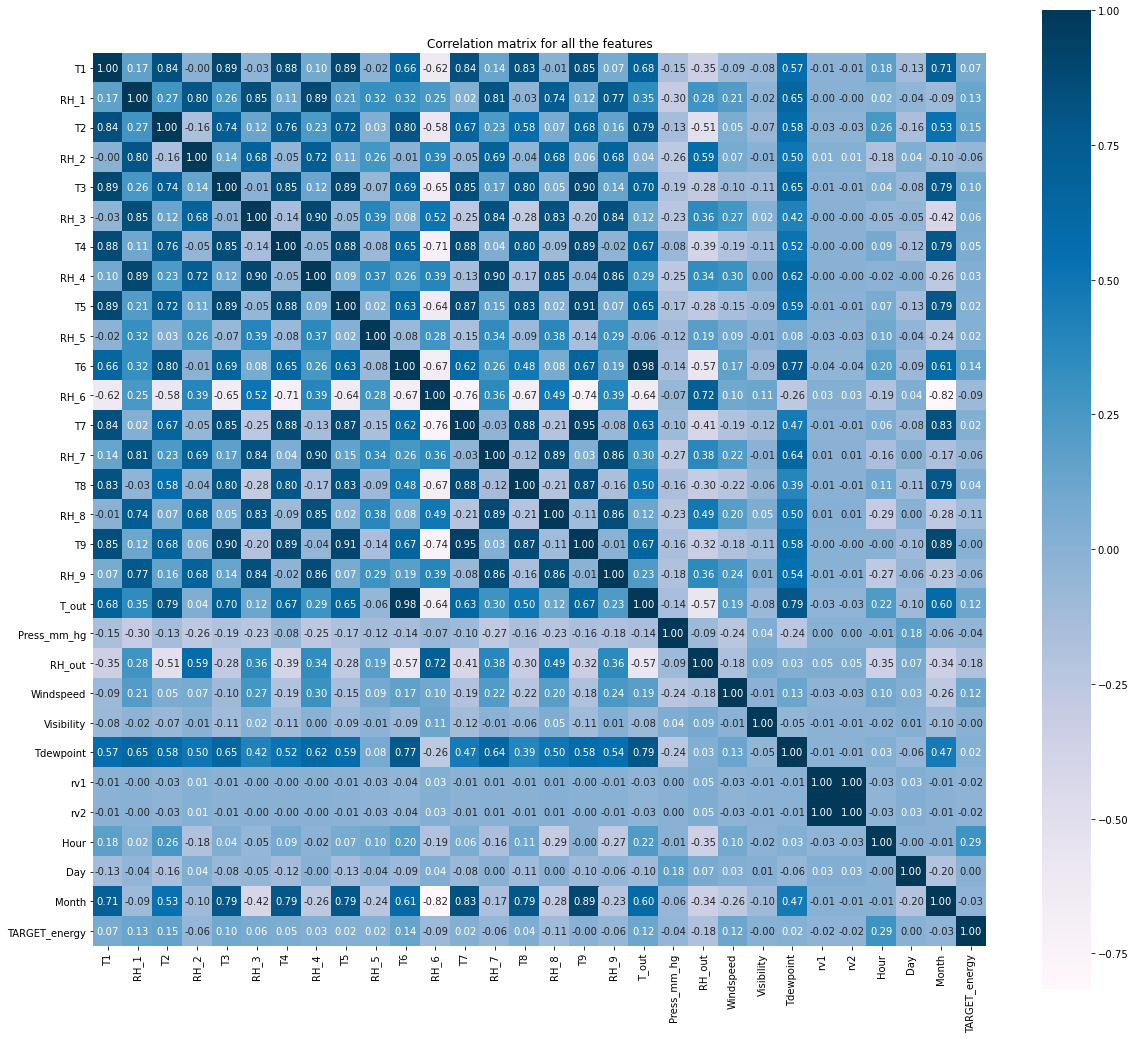

In [23]:
# Drawing correlation matrix of all the features
plt.figure(figsize=(20,18))
mat = get_correlation_matrix(X)
plt.title("Correlation matrix for all the features")
plt.show()

After scaling and splitting the data, run cross validation with hyper parameter tuning for both Random Forest and Gradient Boosting models to receive the best parameter set. 

In [24]:
X_scaled = apply_scaling(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, test_size = 0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20)

In [25]:
rf_params = run_random_forest(X_train, X_val, y_train, y_val)

****** Building Random Forest Model *****
Train set Accuracy:  1.0
Validation set Accuracy:  0.9979313648209559
Best parameters set for Random Forest Regressor:
{'bootstrap': False, 'criterion': 'mae', 'max_depth': 500, 'max_features': 'auto'}



In [46]:
modelRF = RandomForestRegressor(**rf_params)
modelRF.fit(X_train, y_train)
y_predRF = modelRF.predict(X_test)

mae = mean_absolute_error(y_test, y_predRF)
mse = mean_squared_error(y_test, y_predRF)
r2_value = r2_score(y_test, y_predRF)

print("Mean Absolute error: ", mae)
print("Mean Squared error: ", mse)
print("R-squared value: ",r2_value)

Mean Absolute error:  0.5278875379939553
Mean Squared error:  16.658883400878178
R-squared value:  0.9979533646705153


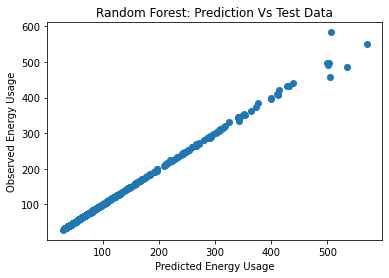

In [35]:
predTest = pd.DataFrame({"prediction": y_predRF, "observed": y_test})
plt.scatter(predTest['prediction'], predTest['observed'])
plt.title("Random Forest: Prediction Vs Test Data")
plt.xlabel("Predicted Energy Usage") 
plt.ylabel("Observed Energy Usage")
plt.show()

In [30]:
gbm_params = run_gbm(X_train, X_val, y_train, y_val)

***** Building Gradient Boosting Model *****
Train set Accuracy:  0.9896675211835576
Validation set Accuracy:  0.9684070228543311
Best parameters set for Gradient Boosting Regressor:
{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'ls', 'max_features': 'sqrt'}



In [45]:
modelGB = GradientBoostingRegressor(**gbm_params)
modelGB.fit(X_train, y_train)
y_predGB = modelGB.predict(X_test)

mae = mean_absolute_error(y_test, y_predGB)
mse = mean_squared_error(y_test, y_predGB)
r2_value = r2_score(y_test, y_predGB)

print("Mean Absolute error: ", mae)
print("Mean Squared error: ", mse)
print("R-squared value: ",r2_value)

Mean Absolute error:  10.190396751758188
Mean Squared error:  283.2536058606902
R-squared value:  0.9652007386684845


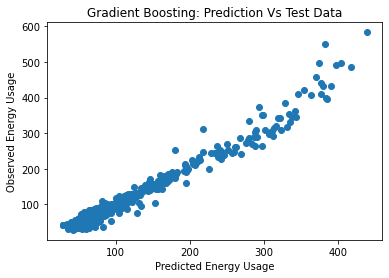

In [34]:
predTest = pd.DataFrame({"prediction": y_predGB, "observed": y_test})
plt.scatter(predTest['prediction'], predTest['observed'])
plt.title("Gradient Boosting: Prediction Vs Test Data")
plt.xlabel("Predicted Energy Usage") 
plt.ylabel("Observed Energy Usage")
plt.show()

In [42]:
xgb_params = run_xgb(X_train, X_val, y_train, y_val)

***** Building Extreme Gradient Boosting Model *****
[14:17:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train set Accuracy:  0.9999742343503166
Validation set Accuracy:  0.9993493892081011
Best parameters set for Extreme Gradient Boosting Regressor:
{'alpha': 1, 'gamma': 10, 'learning_rate': 0.1, 'max_features': 'log2'}



In [43]:
modelXGB = XGBRegressor(**xgb_params)
modelXGB.fit(X_train, y_train)
y_predXGB = modelXGB.predict(X_test)

mae = mean_absolute_error(y_test, y_predXGB)
mse = mean_squared_error(y_test, y_predXGB)
r2_value = r2_score(y_test, y_predXGB)

print("Mean Absolute error: ", mae)
print("Mean Squared error: ", mse)
print("R-squared value: ",r2_value)

[14:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Mean Absolute error:  0.3039547418750892
Mean Squared error:  3.319704714042054
R-squared value:  0.9995921560414514


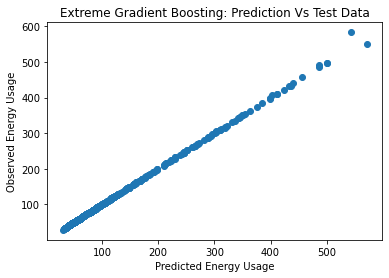

In [44]:
predTest = pd.DataFrame({"prediction": y_predXGB, "observed": y_test})
plt.scatter(predTest['prediction'], predTest['observed'])
plt.title("Extreme Gradient Boosting: Prediction Vs Test Data")
plt.xlabel("Predicted Energy Usage") 
plt.ylabel("Observed Energy Usage")
plt.show()